In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge
import os
import seaborn as sns
import pandas as pd

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Sri
[nltk_data]     pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sri
[nltk_data]     pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = set()

    sent1 = [token.lower() for token in sent1 if token.lower() not in stopwords]
    sent2 = [token.lower() for token in sent2 if token.lower() not in stopwords]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)  
    vector2 = [0] * len(all_words)

    for w in sent1:
        vector1[all_words.index(w)] += 1

    for w in sent2:
        vector2[all_words.index(w)] += 1

    return 1 - nltk.cluster.util.cosine_distance(vector1, vector2)

In [4]:
def build_similarity_matrix(sentences, stopwords):
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stopwords)
    return similarity_matrix

In [5]:
def visualize_similarity_matrix(similarity_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Sentence Similarity Matrix')
    plt.xlabel('Sentences')
    plt.ylabel('Sentences')
    plt.show()

In [6]:
def visualize_sentence_similarity_graph(graph, sentences):
    plt.figure(figsize=(50, 50))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, labels={i: sent for i, sent in enumerate(sentences)}, with_labels=True, node_size=1000, font_size=12)
    plt.title("Sentence Similarity Graph")
    plt.show()

In [7]:
with open('C:/Users/Sri pavan/Desktop/BBC News Summary/News Articles/entertainment/027.txt', 'r') as file:
    text = file.read()

In [8]:
with open('C:/Users/Sri pavan/Desktop/BBC News Summary/Summaries/entertainment/027.txt', 'r') as ref_file:
    reference_text = ref_file.read()

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
sentences = sent_tokenize(text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

In [11]:
sentence_similarity_matrix = build_similarity_matrix(tokenized_sentences, stop_words)

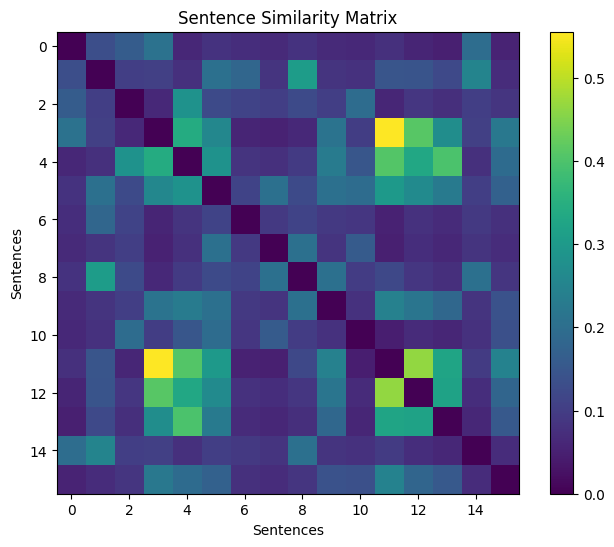

In [12]:
visualize_similarity_matrix(sentence_similarity_matrix)

In [13]:
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
scores = nx.pagerank(sentence_similarity_graph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

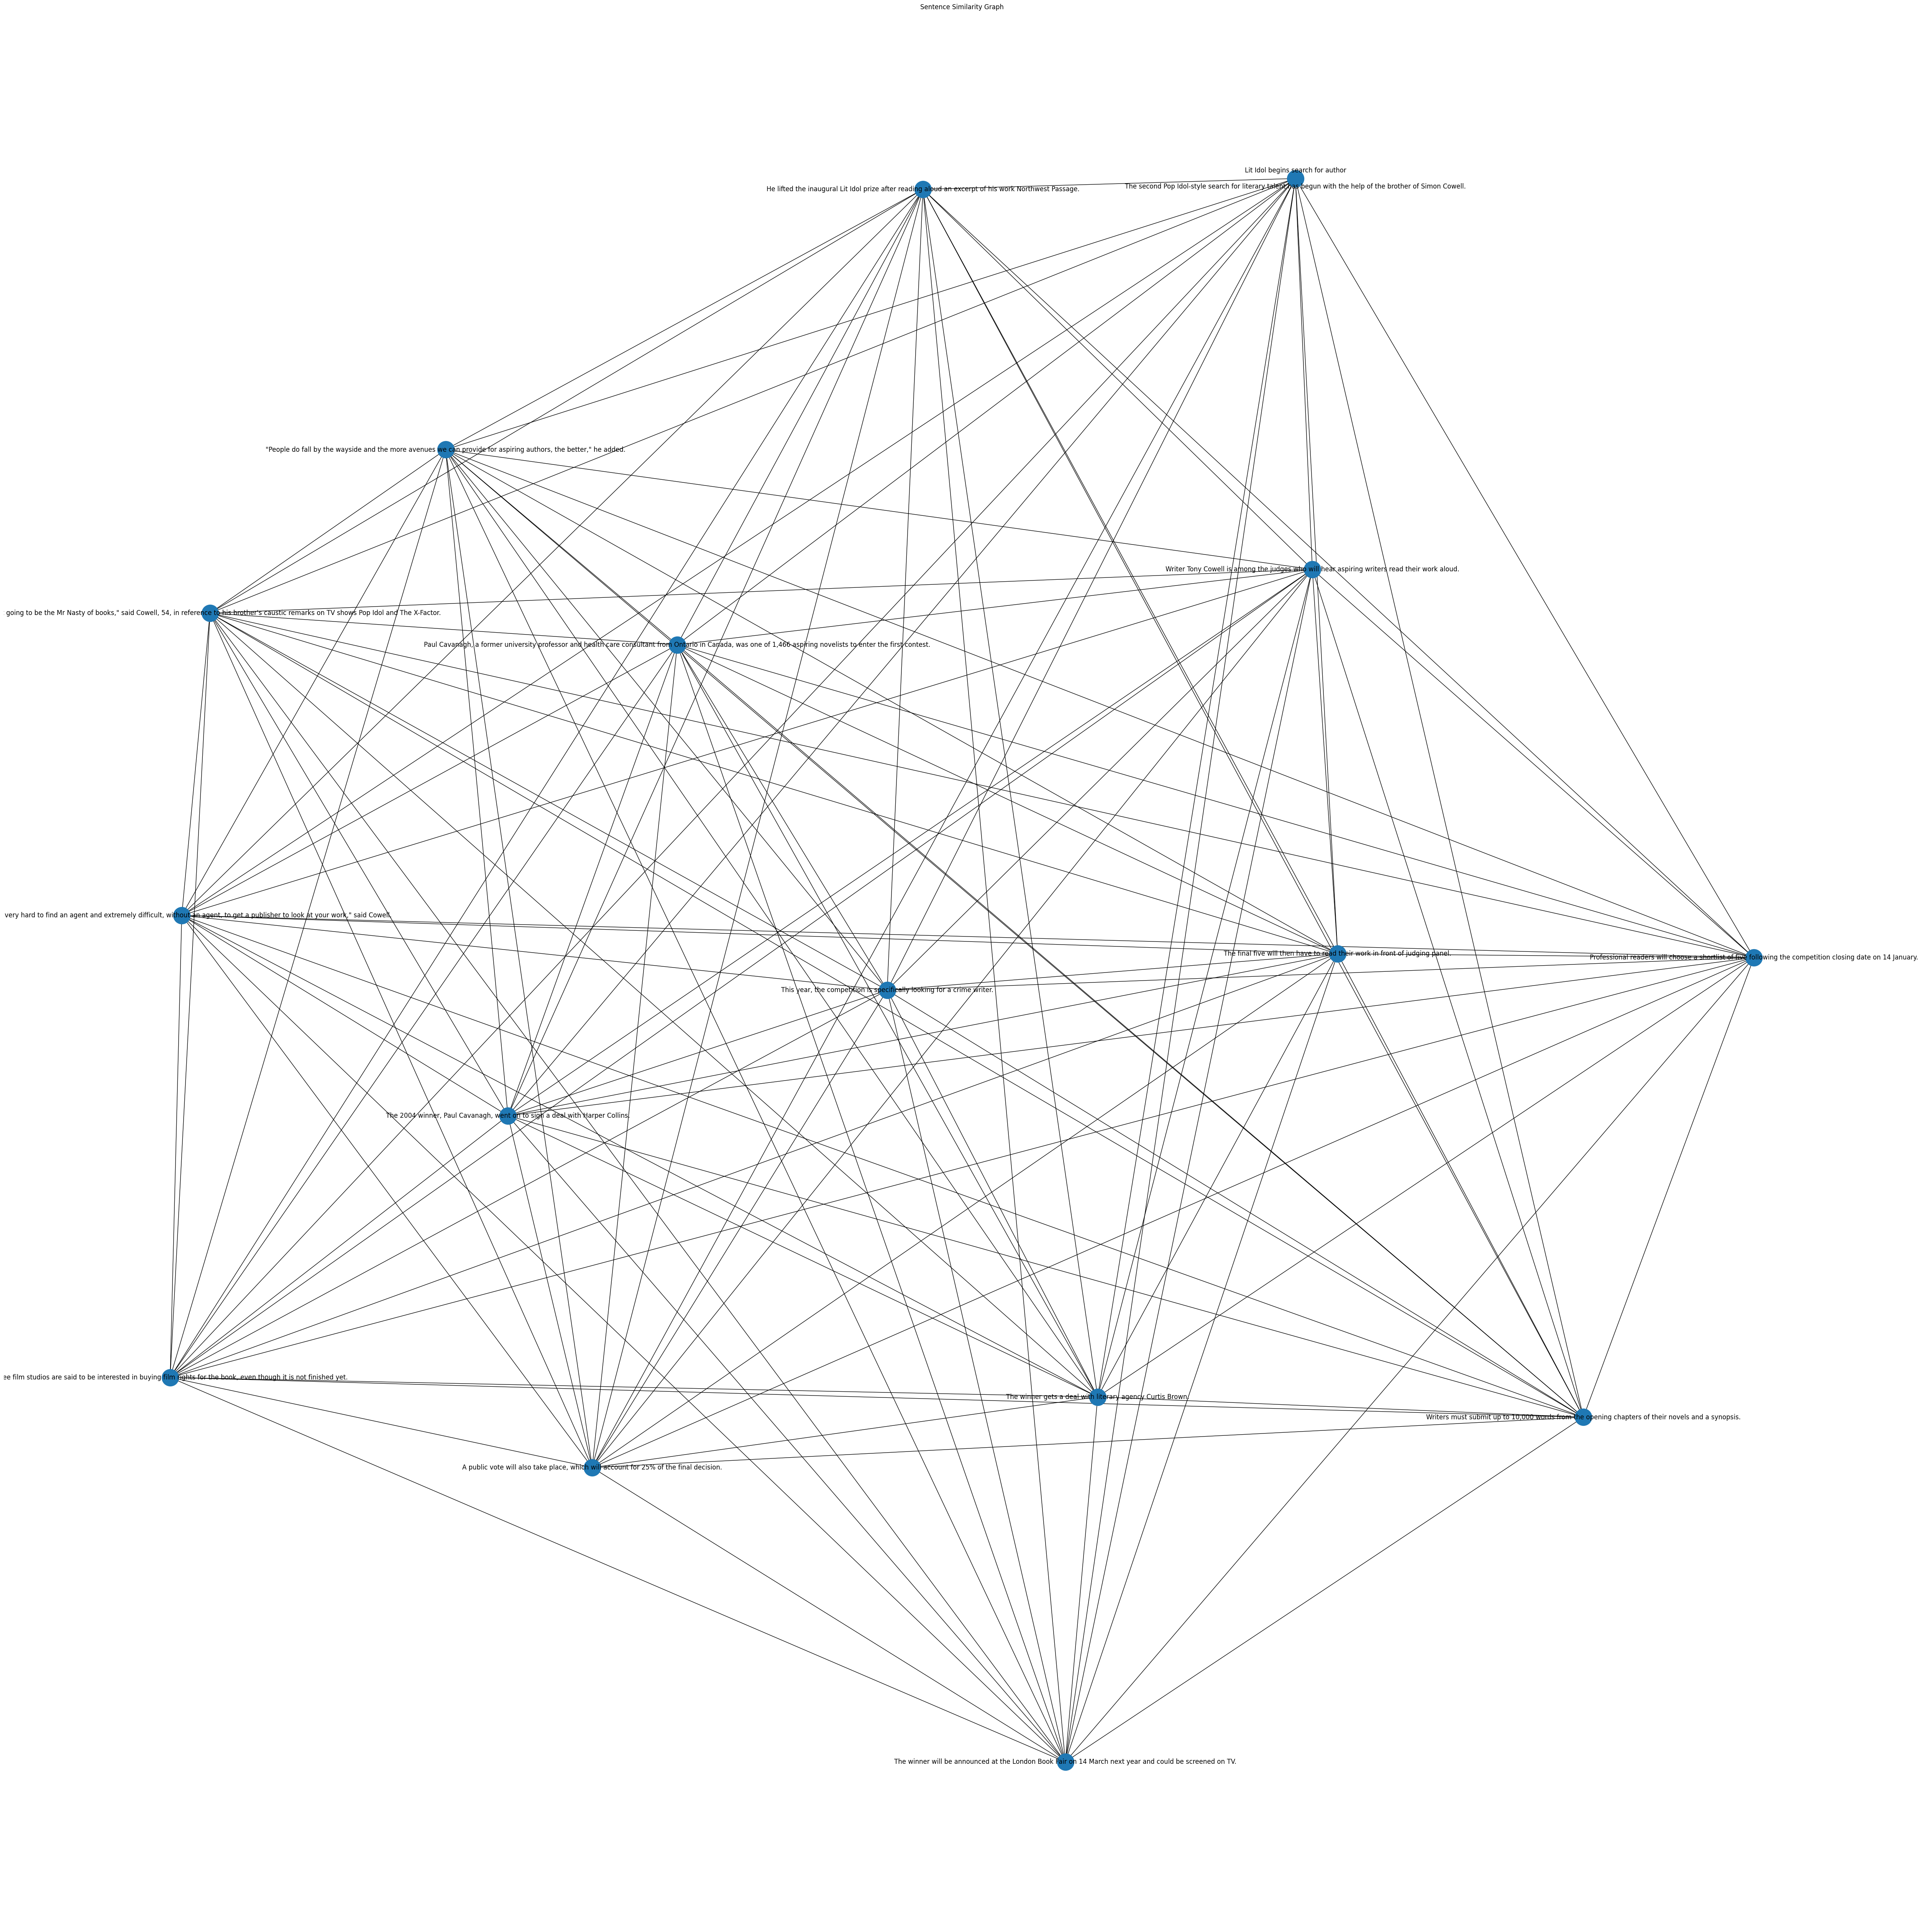

In [14]:
visualize_sentence_similarity_graph(sentence_similarity_graph, sentences)

In [15]:
print(text)

Lit Idol begins search for author

The second Pop Idol-style search for literary talent has begun with the help of the brother of Simon Cowell.

Writer Tony Cowell is among the judges who will hear aspiring writers read their work aloud. The winner gets a deal with literary agency Curtis Brown. "I'm not going to be the Mr Nasty of books," said Cowell, 54, in reference to his brother's caustic remarks on TV shows Pop Idol and The X-Factor. The 2004 winner, Paul Cavanagh, went on to sign a deal with Harper Collins.

This year, the competition is specifically looking for a crime writer. Writers must submit up to 10,000 words from the opening chapters of their novels and a synopsis. Professional readers will choose a shortlist of five following the competition closing date on 14 January.

The final five will then have to read their work in front of judging panel. A public vote will also take place, which will account for 25% of the final decision. The winner will be announced at the London

In [16]:
top_n = 5
summarize_text = [ranked_sentences[i][1] for i in range(top_n)]

In [17]:
summary = ' '.join(summarize_text)
print(summary)

"It's very, very hard to find an agent and extremely difficult, without an agent, to get a publisher to look at your work," said Cowell. The 2004 winner, Paul Cavanagh, went on to sign a deal with Harper Collins. "I'm not going to be the Mr Nasty of books," said Cowell, 54, in reference to his brother's caustic remarks on TV shows Pop Idol and The X-Factor. This year, the competition is specifically looking for a crime writer. "People do fall by the wayside and the more avenues we can provide for aspiring authors, the better," he added.


In [18]:
rouge = Rouge()
rouge_scores = rouge.get_scores(summary, reference_text)

print("ROUGE Scores:")
print(rouge_scores)

ROUGE Scores:
[{'rouge-1': {'r': 0.6236559139784946, 'p': 0.725, 'f': 0.6705202262421064}, 'rouge-2': {'r': 0.5409836065573771, 'p': 0.6804123711340206, 'f': 0.6027397210925545}, 'rouge-l': {'r': 0.6129032258064516, 'p': 0.7125, 'f': 0.6589595326004879}}]


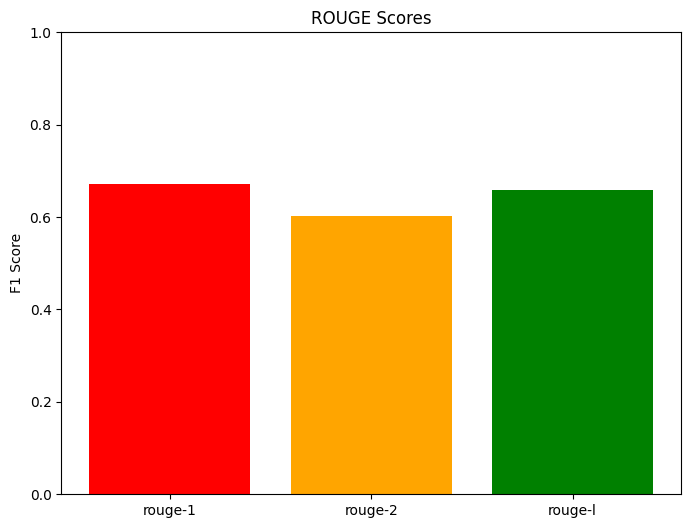

In [19]:
# ROUGE Scores
rouge_metrics = ['rouge-1', 'rouge-2', 'rouge-l']
rouge_scores_avg = [rouge_scores[0][m]['f'] for m in rouge_metrics]

plt.figure(figsize=(8, 6))
plt.bar(rouge_metrics, rouge_scores_avg, color=['red', 'orange', 'green'])
plt.title('ROUGE Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Adjust the y-axis limit if necessary
plt.show()




In [20]:
text_files_dir = 'C:/Users/Sri pavan/Desktop/BBC News Summary/News Articles/business'
reference_summary_dir = 'C:/Users/Sri pavan/Desktop/BBC News Summary/Summaries/business'

In [21]:
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def read_reference_summary_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

In [22]:
def summarize_text(text, summary_length):
    stop_words = set(stopwords.words('english'))

    # Tokenize and preprocess text
    sentences = sent_tokenize(text)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Generate similarity matrix across sentences
    sentence_similarity_matrix = build_similarity_matrix(tokenized_sentences, stop_words)

    # Rank sentences based on similarity score
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

    # Select top sentences as summary based on summary length
    summary_sentences_count = int(len(sentences) * summary_length / 100)
    summarize_text = [ranked_sentences[i][1] for i in range(summary_sentences_count)]

    # Combine the sentences to generate summary
    summary = ' '.join(summarize_text)

    return summary

In [23]:
rouge = Rouge()

In [24]:
for filename in os.listdir(text_files_dir):
    if filename.endswith(".txt"):
        text_file_path = os.path.join(text_files_dir, filename)
        reference_summary_path = os.path.join(reference_summary_dir, filename)
        
        # Read text content and reference summary content
        text_content = read_text_file(text_file_path)
        reference_summary_content = read_reference_summary_file(reference_summary_path)
        
        # Generate summary for the text content
        generated_summary = summarize_text(text_content, summary_length=25)  # Adjust summary_length as needed
        
        # Compare the generated summary with the reference summary
        rouge = Rouge()
        rouge_scores = rouge.get_scores(generated_summary, reference_summary_content)
        
        # Print the filename and its corresponding ROUGE scores
        print(f"File: {filename}")
        print("ROUGE Scores:")
        print(rouge_scores)

File: 001.txt
ROUGE Scores:
[{'rouge-1': {'r': 0.6388888888888888, 'p': 0.8734177215189873, 'f': 0.737967909558752}, 'rouge-2': {'r': 0.539568345323741, 'p': 0.8152173913043478, 'f': 0.6493506445576357}, 'rouge-l': {'r': 0.6388888888888888, 'p': 0.8734177215189873, 'f': 0.737967909558752}}]
File: 002.txt
ROUGE Scores:
[{'rouge-1': {'r': 0.38181818181818183, 'p': 0.7241379310344828, 'f': 0.4999999954790251}, 'rouge-2': {'r': 0.2532467532467532, 'p': 0.5909090909090909, 'f': 0.3545454503454546}, 'rouge-l': {'r': 0.36363636363636365, 'p': 0.6896551724137931, 'f': 0.4761904716695012}}]
File: 003.txt
ROUGE Scores:
[{'rouge-1': {'r': 0.5909090909090909, 'p': 1.0, 'f': 0.7428571381877552}, 'rouge-2': {'r': 0.5161290322580645, 'p': 0.9696969696969697, 'f': 0.6736842059922438}, 'rouge-l': {'r': 0.5909090909090909, 'p': 1.0, 'f': 0.7428571381877552}}]
File: 004.txt
ROUGE Scores:
[{'rouge-1': {'r': 0.5777777777777777, 'p': 1.0, 'f': 0.732394361555247}, 'rouge-2': {'r': 0.49489795918367346, 'p': 0

In [25]:
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

In [26]:
for filename in os.listdir(text_files_dir):
    if filename.endswith(".txt"):
        text_file_path = os.path.join(text_files_dir, filename)
        reference_summary_path = os.path.join(reference_summary_dir, filename)
        
        # Read text content and reference summary content
        text_content = read_text_file(text_file_path)
        reference_summary_content = read_reference_summary_file(reference_summary_path)
        
        # Generate summary for the text content
        generated_summary = summarize_text(text_content, summary_length=30)  # Adjust summary_length as needed
        
        # Calculate ROUGE scores
        rouge = Rouge()
        rouge_scores = rouge.get_scores(generated_summary, reference_summary_content)
        
        # Accumulate ROUGE scores
        rouge_1_scores.append(rouge_scores[0]['rouge-1']['f'])
        rouge_2_scores.append(rouge_scores[0]['rouge-2']['f'])
        rouge_l_scores.append(rouge_scores[0]['rouge-l']['f'])

        # Print the filename and its corresponding ROUGE scores
        print(f"File: {filename}")
        print("ROUGE Scores:")
        print(rouge_scores)

File: 001.txt
ROUGE Scores:
[{'rouge-1': {'r': 0.7685185185185185, 'p': 0.8556701030927835, 'f': 0.8097560925753718}, 'rouge-2': {'r': 0.6618705035971223, 'p': 0.7666666666666667, 'f': 0.7104247054516182}, 'rouge-l': {'r': 0.7685185185185185, 'p': 0.8556701030927835, 'f': 0.8097560925753718}}]
File: 002.txt
ROUGE Scores:
[{'rouge-1': {'r': 0.6, 'p': 0.8048780487804879, 'f': 0.6874999951063369}, 'rouge-2': {'r': 0.5064935064935064, 'p': 0.7358490566037735, 'f': 0.5999999951704142}, 'rouge-l': {'r': 0.5818181818181818, 'p': 0.7804878048780488, 'f': 0.6666666617730035}}]
File: 003.txt
ROUGE Scores:
[{'rouge-1': {'r': 0.5909090909090909, 'p': 1.0, 'f': 0.7428571381877552}, 'rouge-2': {'r': 0.5161290322580645, 'p': 0.9696969696969697, 'f': 0.6736842059922438}, 'rouge-l': {'r': 0.5909090909090909, 'p': 1.0, 'f': 0.7428571381877552}}]
File: 004.txt
ROUGE Scores:
[{'rouge-1': {'r': 0.6666666666666666, 'p': 1.0, 'f': 0.7999999952000001}, 'rouge-2': {'r': 0.5816326530612245, 'p': 0.9661016949152

In [27]:
avg_rouge_1 = sum(rouge_1_scores) / len(rouge_1_scores)
avg_rouge_2 = sum(rouge_2_scores) / len(rouge_2_scores)
avg_rouge_l = sum(rouge_l_scores) / len(rouge_l_scores)

In [28]:
print("\nAverage ROUGE Scores:")
print(f"ROUGE-1: {avg_rouge_1}")
print(f"ROUGE-2: {avg_rouge_2}")
print(f"ROUGE-L: {avg_rouge_l}")


Average ROUGE Scores:
ROUGE-1: 0.630859998276151
ROUGE-2: 0.534926018078028
ROUGE-L: 0.6249272045123194


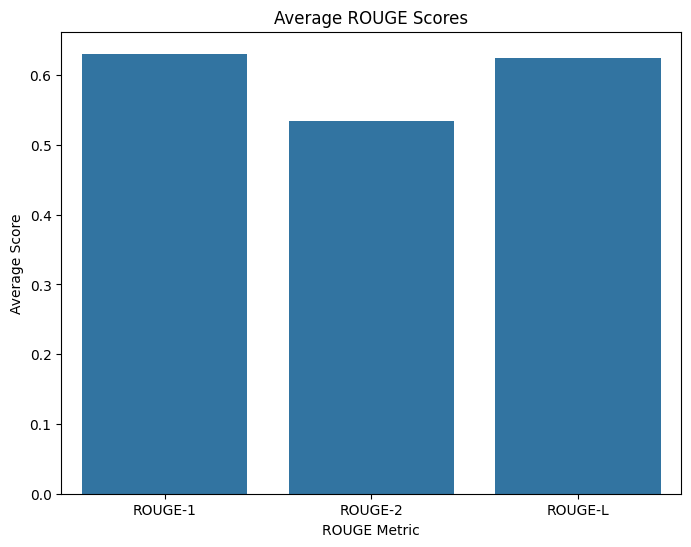

In [29]:
data = {
    'ROUGE Metric': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L'],
    'Average Score': [avg_rouge_1, avg_rouge_2, avg_rouge_l]
}
df = pd.DataFrame(data)

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='ROUGE Metric', y='Average Score', data=df)
plt.title('Average ROUGE Scores')
plt.xlabel('ROUGE Metric')
plt.ylabel('Average Score')
plt.show()

In [30]:
rouge_1_precision = []
rouge_1_recall = []
rouge_1_f1 = []
rouge_2_precision = []
rouge_2_recall = []
rouge_2_f1 = []
rouge_l_precision = []
rouge_l_recall = []
rouge_l_f1 = []

In [31]:
for filename in os.listdir(text_files_dir):
    if filename.endswith(".txt"):
        text_file_path = os.path.join(text_files_dir, filename)
        reference_summary_path = os.path.join(reference_summary_dir, filename)
        
        # Read text content and reference summary content
        text_content = read_text_file(text_file_path)
        reference_summary_content = read_reference_summary_file(reference_summary_path)
        
        # Generate summary for the text content
        generated_summary = summarize_text(text_content, summary_length=30)  # Adjust summary_length as needed
        
        # Calculate ROUGE scores
        rouge = Rouge()
        rouge_scores = rouge.get_scores(generated_summary, reference_summary_content)
        
        # Accumulate precision, recall, and F1 scores for ROUGE-1
        rouge_1_precision.append(rouge_scores[0]['rouge-1']['p'])
        rouge_1_recall.append(rouge_scores[0]['rouge-1']['r'])
        rouge_1_f1.append(rouge_scores[0]['rouge-1']['f'])
        
        # Accumulate precision, recall, and F1 scores for ROUGE-2
        rouge_2_precision.append(rouge_scores[0]['rouge-2']['p'])
        rouge_2_recall.append(rouge_scores[0]['rouge-2']['r'])
        rouge_2_f1.append(rouge_scores[0]['rouge-2']['f'])
        
        # Accumulate precision, recall, and F1 scores for ROUGE-L
        rouge_l_precision.append(rouge_scores[0]['rouge-l']['p'])
        rouge_l_recall.append(rouge_scores[0]['rouge-l']['r'])
        rouge_l_f1.append(rouge_scores[0]['rouge-l']['f'])

# Calculate average precision, recall, and F1 scores for ROUGE-1
avg_rouge_1_precision = sum(rouge_1_precision) / len(rouge_1_precision)
avg_rouge_1_recall = sum(rouge_1_recall) / len(rouge_1_recall)
avg_rouge_1_f1 = sum(rouge_1_f1) / len(rouge_1_f1)

# Calculate average precision, recall, and F1 scores for ROUGE-2
avg_rouge_2_precision = sum(rouge_2_precision) / len(rouge_2_precision)
avg_rouge_2_recall = sum(rouge_2_recall) / len(rouge_2_recall)
avg_rouge_2_f1 = sum(rouge_2_f1) / len(rouge_2_f1)

# Calculate average precision, recall, and F1 scores for ROUGE-L
avg_rouge_l_precision = sum(rouge_l_precision) / len(rouge_l_precision)
avg_rouge_l_recall = sum(rouge_l_recall) / len(rouge_l_recall)
avg_rouge_l_f1 = sum(rouge_l_f1) / len(rouge_l_f1)

# Print average precision, recall, and F1 scores
print("\nAverage ROUGE Scores:")
print("ROUGE-1:")
print(f"Precision: {avg_rouge_1_precision}")
print(f"Recall: {avg_rouge_1_recall}")
print(f"F1 Score: {avg_rouge_1_f1}")

print("\nROUGE-2:")
print(f"Precision: {avg_rouge_2_precision}")
print(f"Recall: {avg_rouge_2_recall}")
print(f"F1 Score: {avg_rouge_2_f1}")

print("\nROUGE-L:")
print(f"Precision: {avg_rouge_l_precision}")
print(f"Recall: {avg_rouge_l_recall}")
print(f"F1 Score: {avg_rouge_l_f1}")


Average ROUGE Scores:
ROUGE-1:
Precision: 0.7740442363757013
Recall: 0.5389757895407888
F1 Score: 0.630859998276151

ROUGE-2:
Precision: 0.6929944867578154
Recall: 0.44165691722810124
F1 Score: 0.534926018078028

ROUGE-L:
Precision: 0.7669272484623768
Recall: 0.5337793142267511
F1 Score: 0.6249272045123194


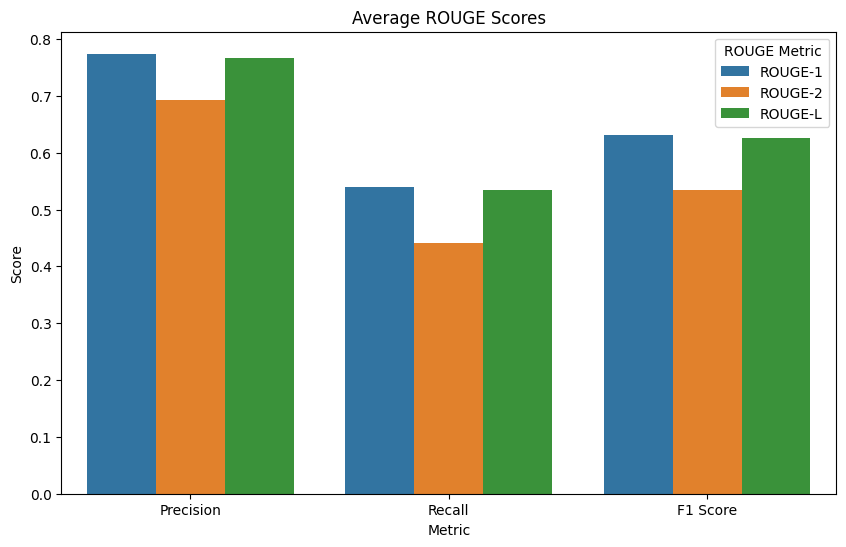

In [32]:
data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'ROUGE-1': [avg_rouge_1_precision, avg_rouge_1_recall, avg_rouge_1_f1],
    'ROUGE-2': [avg_rouge_2_precision, avg_rouge_2_recall, avg_rouge_2_f1],
    'ROUGE-L': [avg_rouge_l_precision, avg_rouge_l_recall, avg_rouge_l_f1]
}
df = pd.DataFrame(data)

# Melt the DataFrame for better visualization
df_melted = df.melt(id_vars=['Metric'], var_name='ROUGE Metric', value_name='Score')

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='ROUGE Metric', data=df_melted)
plt.title('Average ROUGE Scores')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='ROUGE Metric')
plt.show()

In [33]:
summary_lengths = [20, 25, 30, 35, 40]

In [34]:
for summary_length in summary_lengths:
    # Lists to store ROUGE scores for each file
    rouge_1_precision = []
    rouge_1_recall = []
    rouge_1_f1 = []

    rouge_2_precision = []
    rouge_2_recall = []
    rouge_2_f1 = []

    rouge_l_precision = []
    rouge_l_recall = []
    rouge_l_f1 = []

    # Iterate through text files and their corresponding reference summary files
    for filename in os.listdir(text_files_dir):
        if filename.endswith(".txt"):
            text_file_path = os.path.join(text_files_dir, filename)
            reference_summary_path = os.path.join(reference_summary_dir, filename)
            
            # Read text content and reference summary content
            text_content = read_text_file(text_file_path)
            reference_summary_content = read_reference_summary_file(reference_summary_path)
            
            # Generate summary for the text content
            generated_summary = summarize_text(text_content, summary_length=summary_length)
            
            # Calculate ROUGE scores
            rouge = Rouge()
            rouge_scores = rouge.get_scores(generated_summary, reference_summary_content)
            
            # Accumulate precision, recall, and F1 scores for ROUGE-1
            rouge_1_precision.append(rouge_scores[0]['rouge-1']['p'])
            rouge_1_recall.append(rouge_scores[0]['rouge-1']['r'])
            rouge_1_f1.append(rouge_scores[0]['rouge-1']['f'])
            
            # Accumulate precision, recall, and F1 scores for ROUGE-2
            rouge_2_precision.append(rouge_scores[0]['rouge-2']['p'])
            rouge_2_recall.append(rouge_scores[0]['rouge-2']['r'])
            rouge_2_f1.append(rouge_scores[0]['rouge-2']['f'])
            
            # Accumulate precision, recall, and F1 scores for ROUGE-L
            rouge_l_precision.append(rouge_scores[0]['rouge-l']['p'])
            rouge_l_recall.append(rouge_scores[0]['rouge-l']['r'])
            rouge_l_f1.append(rouge_scores[0]['rouge-l']['f'])

    # Calculate average precision, recall, and F1 scores for ROUGE-1
    avg_rouge_1_precision = sum(rouge_1_precision) / len(rouge_1_precision)
    avg_rouge_1_recall = sum(rouge_1_recall) / len(rouge_1_recall)
    avg_rouge_1_f1 = sum(rouge_1_f1) / len(rouge_1_f1)

    # Calculate average precision, recall, and F1 scores for ROUGE-2
    avg_rouge_2_precision = sum(rouge_2_precision) / len(rouge_2_precision)
    avg_rouge_2_recall = sum(rouge_2_recall) / len(rouge_2_recall)
    avg_rouge_2_f1 = sum(rouge_2_f1) / len(rouge_2_f1)

    # Calculate average precision, recall, and F1 scores for ROUGE-L
    avg_rouge_l_precision = sum(rouge_l_precision) / len(rouge_l_precision)
    avg_rouge_l_recall = sum(rouge_l_recall) / len(rouge_l_recall)
    avg_rouge_l_f1 = sum(rouge_l_f1) / len(rouge_l_f1)

    # Print average precision, recall, and F1 scores for the current summary length
    print(f"\nSummary Length: {summary_length}%")
    print("Average ROUGE Scores:")
    print("ROUGE-1:")
    print(f"Precision: {avg_rouge_1_precision}")
    print(f"Recall: {avg_rouge_1_recall}")
    print(f"F1 Score: {avg_rouge_1_f1}")

    print("\nROUGE-2:")
    print(f"Precision: {avg_rouge_2_precision}")
    print(f"Recall: {avg_rouge_2_recall}")
    print(f"F1 Score: {avg_rouge_2_f1}")

    print("\nROUGE-L:")
    print(f"Precision: {avg_rouge_l_precision}")
    print(f"Recall: {avg_rouge_l_recall}")
    print(f"F1 Score: {avg_rouge_l_f1}")


Summary Length: 20%
Average ROUGE Scores:
ROUGE-1:
Precision: 0.8356977128683499
Recall: 0.3985307785504682
F1 Score: 0.5340670302507985

ROUGE-2:
Precision: 0.7617729596915779
Recall: 0.3109718946029702
F1 Score: 0.4362216707769531

ROUGE-L:
Precision: 0.8285487867881263
Recall: 0.3950905649582619
F1 Score: 0.529490203497718

Summary Length: 25%
Average ROUGE Scores:
ROUGE-1:
Precision: 0.8019393228403389
Recall: 0.47543286904206705
F1 Score: 0.5927420327848391

ROUGE-2:
Precision: 0.7228997293865245
Recall: 0.38114471530143623
F1 Score: 0.49505469489305587

ROUGE-L:
Precision: 0.795257208268851
Recall: 0.471441601294466
F1 Score: 0.5877930509028017

Summary Length: 30%
Average ROUGE Scores:
ROUGE-1:
Precision: 0.7740442363757013
Recall: 0.5389757895407888
F1 Score: 0.630859998276151

ROUGE-2:
Precision: 0.6929944867578154
Recall: 0.44165691722810124
F1 Score: 0.534926018078028

ROUGE-L:
Precision: 0.7669272484623768
Recall: 0.5337793142267511
F1 Score: 0.6249272045123194

Summary Le

In [35]:
summary_lengths = [20, 25, 30, 35, 40]

In [36]:
# ROUGE-1 scores
rouge1_recall = [0.3985307785504682, 0.47543286904206705, 0.5389757895407888, 0.5918051176608394, 0.6565377029141399]
rouge1_precision = [0.8356977128683499, 0.8019393228403389, 0.7740442363757013, 0.7489941323876759, 0.721055051500424]
rouge1_f1 = [0.5340670302507985, 0.5927420327848391, 0.630859998276151, 0.6571012792596713, 0.6841236802890385]

In [37]:
# ROUGE-2 scores
rouge2_recall = [0.3109718946029702, 0.38114471530143623, 0.44165691722810124, 0.4929898423734068, 0.559806879845793]
rouge2_precision = [0.7617729596915779, 0.7228997293865245, 0.6929944867578154, 0.6684818735846181, 0.6411687126320346]
rouge2_f1 = [0.4362216707769531, 0.49505469489305587, 0.534926018078028, 0.5633491360632366, 0.5945834883051531]

In [38]:
# ROUGE-L scores
rougeL_recall = [0.3950905649582619, 0.471441601294466, 0.5337793142267511, 0.5863260463800135, 0.6513377875394272]
rougeL_precision = [0.8285487867881263, 0.795257208268851, 0.7669272484623768, 0.7423674430189542, 0.7155251740138258]
rougeL_f1 = [0.529490203497718, 0.5877930509028017, 0.6249272045123194, 0.6511481961642895, 0.6788075688163242]

In [39]:
rouge1_df = pd.DataFrame({'Summary Length': summary_lengths,
                          'Recall': rouge1_recall,
                          'Precision': rouge1_precision,
                          'F1 Score': rouge1_f1})
rouge2_df = pd.DataFrame({'Summary Length': summary_lengths,
                          'Recall': rouge2_recall,
                          'Precision': rouge2_precision,
                          'F1 Score': rouge2_f1})
rougeL_df = pd.DataFrame({'Summary Length': summary_lengths,
                           'Recall': rougeL_recall,
                           'Precision': rougeL_precision,
                           'F1 Score': rougeL_f1})

In [40]:
rouge1_df_melted = rouge1_df.melt(id_vars=['Summary Length'], var_name='Metric', value_name='Score')
rouge2_df_melted = rouge2_df.melt(id_vars=['Summary Length'], var_name='Metric', value_name='Score')
rougeL_df_melted = rougeL_df.melt(id_vars=['Summary Length'], var_name='Metric', value_name='Score')

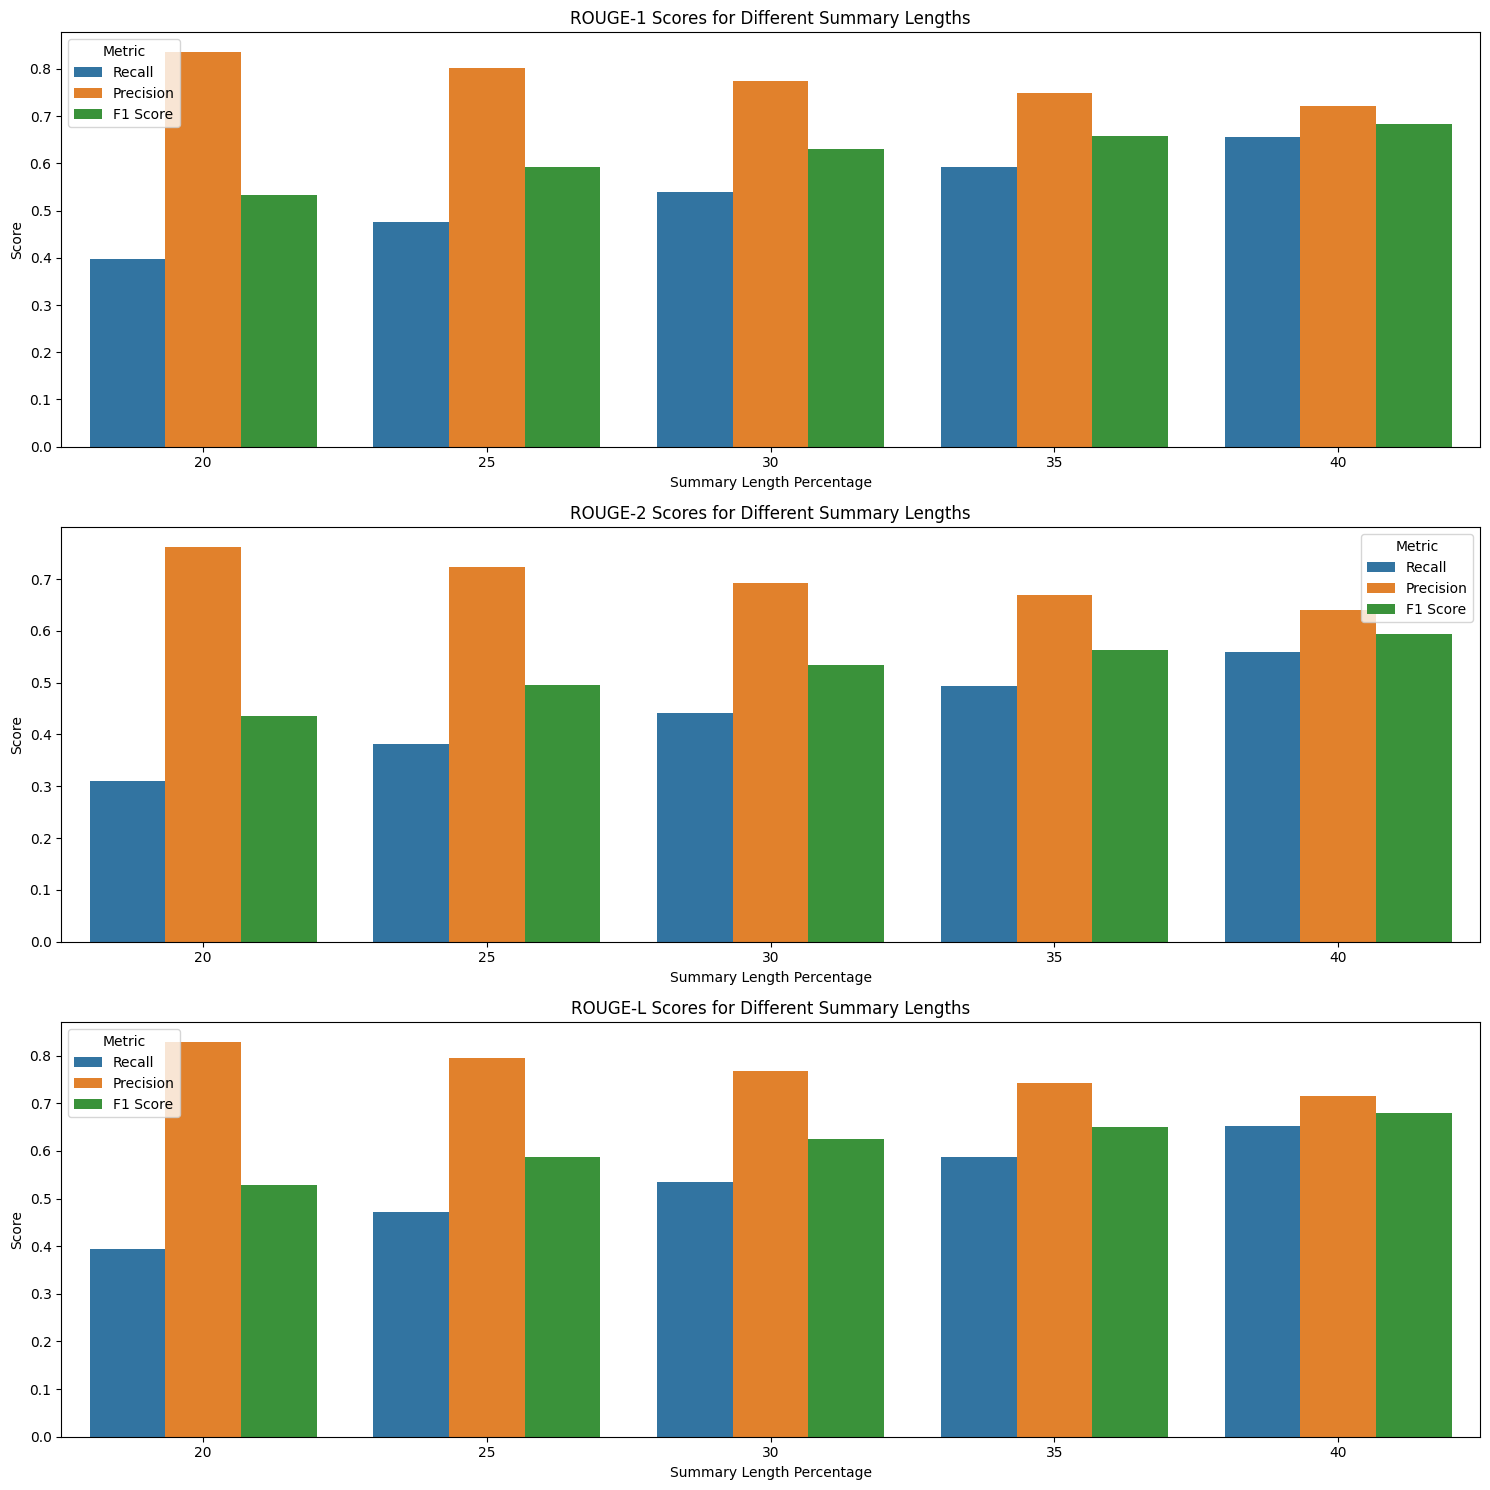

In [41]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.barplot(x='Summary Length', y='Score', hue='Metric', data=rouge1_df_melted)
plt.title('ROUGE-1 Scores for Different Summary Lengths')
plt.xlabel('Summary Length Percentage')
plt.ylabel('Score')

plt.subplot(3, 1, 2)
sns.barplot(x='Summary Length', y='Score', hue='Metric', data=rouge2_df_melted)
plt.title('ROUGE-2 Scores for Different Summary Lengths')
plt.xlabel('Summary Length Percentage')
plt.ylabel('Score')

plt.subplot(3, 1, 3)
sns.barplot(x='Summary Length', y='Score', hue='Metric', data=rougeL_df_melted)
plt.title('ROUGE-L Scores for Different Summary Lengths')
plt.xlabel('Summary Length Percentage')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

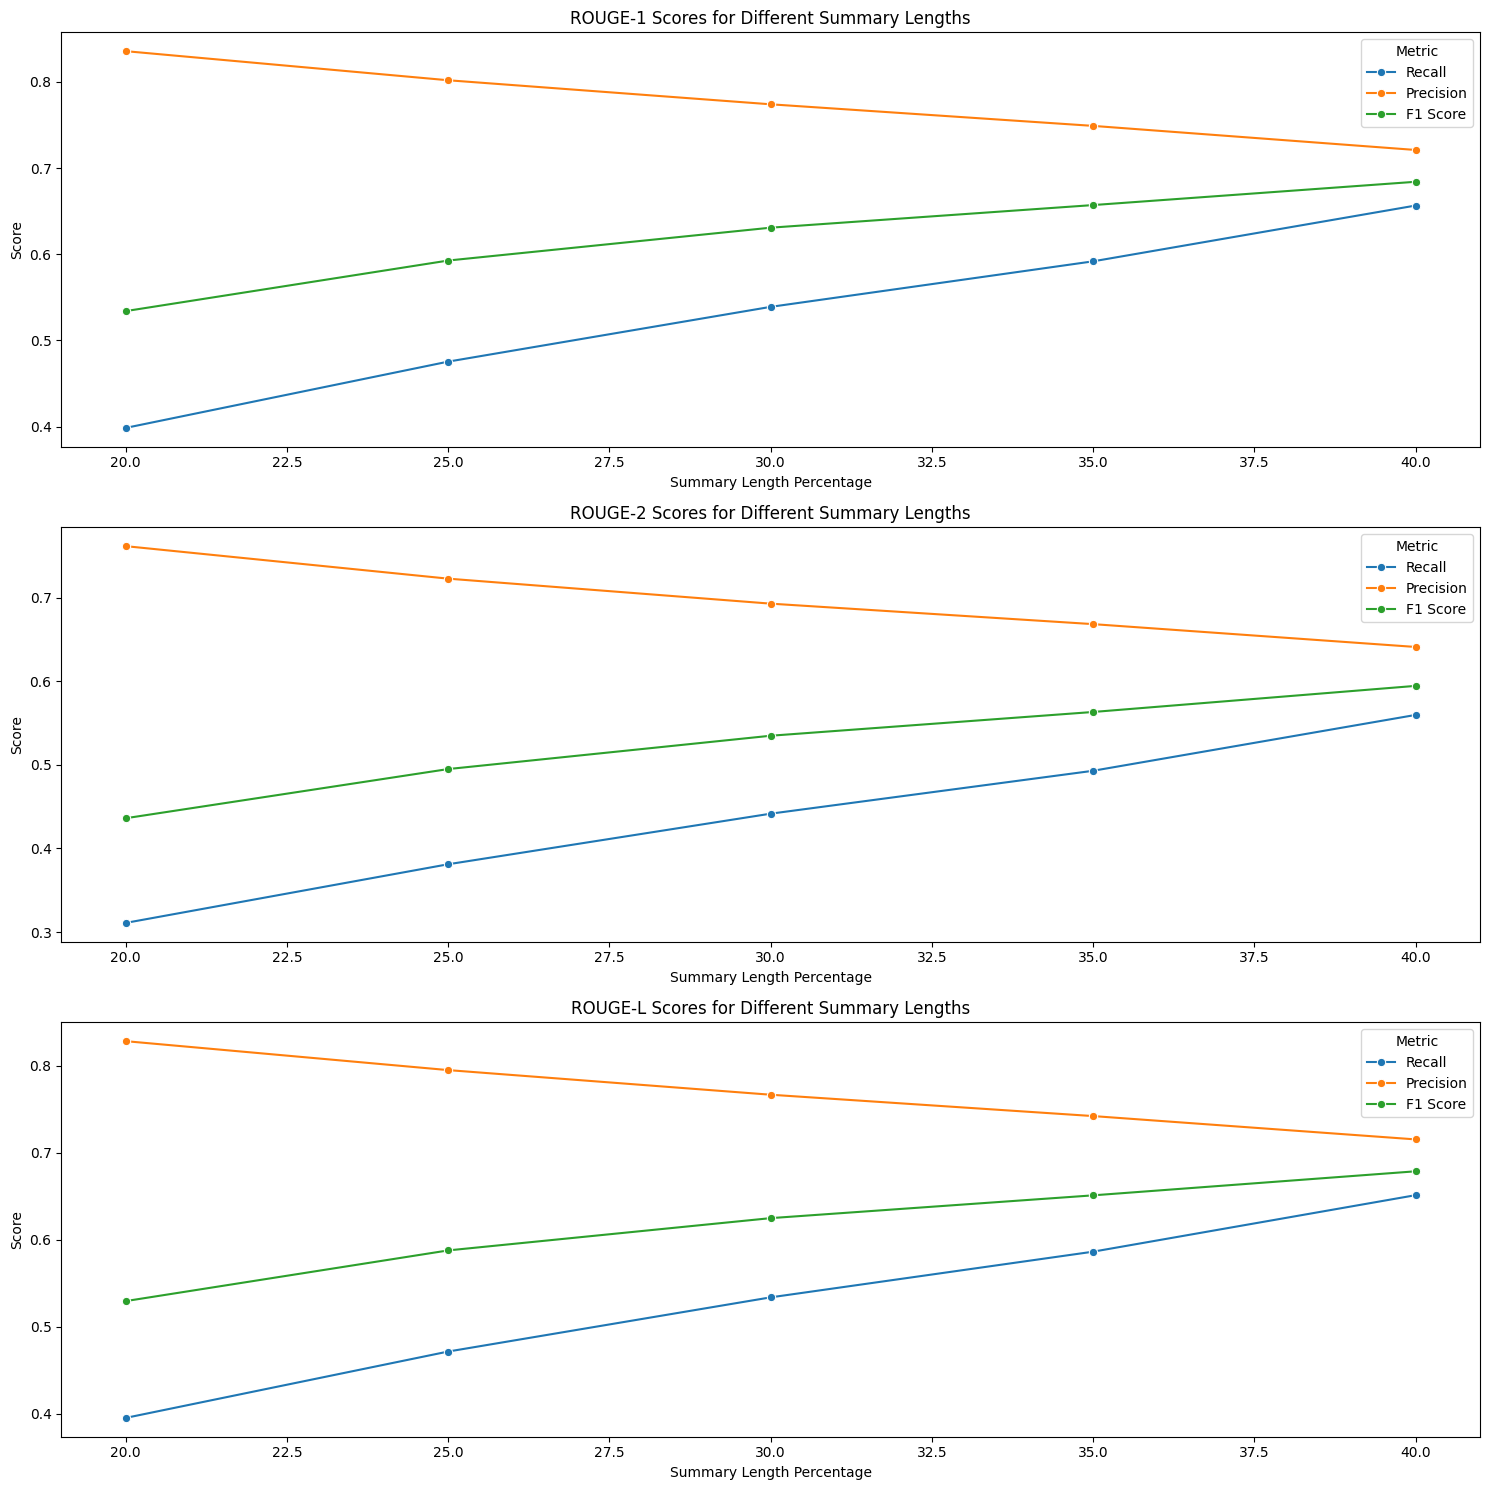

In [42]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.lineplot(x='Summary Length', y='Score', hue='Metric', data=rouge1_df_melted, marker='o')
plt.title('ROUGE-1 Scores for Different Summary Lengths')
plt.xlabel('Summary Length Percentage')
plt.ylabel('Score')

plt.subplot(3, 1, 2)
sns.lineplot(x='Summary Length', y='Score', hue='Metric', data=rouge2_df_melted, marker='o')
plt.title('ROUGE-2 Scores for Different Summary Lengths')
plt.xlabel('Summary Length Percentage')
plt.ylabel('Score')

plt.subplot(3, 1, 3)
sns.lineplot(x='Summary Length', y='Score', hue='Metric', data=rougeL_df_melted, marker='o')
plt.title('ROUGE-L Scores for Different Summary Lengths')
plt.xlabel('Summary Length Percentage')
plt.ylabel('Score')

plt.tight_layout()
plt.show()
